# **Setup**

In [284]:
import numpy as np 
import pandas as pd 
from IPython.display import clear_output
import matplotlib.pyplot as plt 
import seaborn as sns

# **Data Import**

In [285]:
df = pd.read_csv('equipment_failure_data.csv')

print(df.shape)
df.head()

(307751, 16)


,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,EQUIPMENT_FAILURE,S8,AGE_OF_EQUIPMENT
0,100001,12-02-2014,G,O,Y,1,11.088000,145.223448,39.34,3501.0,8.426869,1.9,24.610345,0,0.0,880
1,100001,12-03-2014,G,O,Y,1,8.877943,187.573214,39.20,3489.0,6.483714,1.9,24.671429,0,0.0,881
2,100001,12-04-2014,G,O,Y,1,8.676444,148.363704,38.87,3459.0,6.159659,2.0,24.733333,0,0.0,882
3,100001,12-05-2014,G,O,Y,1,9.988338,133.660000,39.47,3513.0,9.320308,2.0,24.773077,0,0.0,883
4,100001,12-06-2014,G,O,Y,1,8.475264,197.181600,40.33,3589.0,8.022960,1.5,24.808000,0,0.0,884


## **Rename Cols**

In [286]:
df.columns

Index(['ID', 'DATE', 'REGION_CLUSTER', 'MAINTENANCE_VENDOR', 'MANUFACTURER',
       'WELL_GROUP', 'S15', 'S17', 'S13', 'S5', 'S16', 'S19', 'S18',
       'EQUIPMENT_FAILURE', 'S8', 'AGE_OF_EQUIPMENT'],
      dtype='object')

In [287]:
df.rename({'DATE':'Date','WELL_GROUP':'Type','REGION_CLUSTER':'Region',
        #    'ID':'Machine_ID'
        #    'S15':'S15_Sensor','S17':'S17_Sensor','S13':'S13_Sensor','S5':'S5_Sensor','S16':'S16_Sensor','S19':'S19_Sensor','S18':'S18_Sensor',
            'AGE_OF_EQUIPMENT':'Age','EQUIPMENT_FAILURE':'Failure',
           'MAINTENANCE_VENDOR':'Service','MANUFACTURER':'Make'},axis=1,inplace=True)
df.head()

,ID,Date,Region,Service,Make,Type,S15,S17,S13,S5,S16,S19,S18,Failure,S8,Age
0,100001,12-02-2014,G,O,Y,1,11.088000,145.223448,39.34,3501.0,8.426869,1.9,24.610345,0,0.0,880
1,100001,12-03-2014,G,O,Y,1,8.877943,187.573214,39.20,3489.0,6.483714,1.9,24.671429,0,0.0,881
2,100001,12-04-2014,G,O,Y,1,8.676444,148.363704,38.87,3459.0,6.159659,2.0,24.733333,0,0.0,882
3,100001,12-05-2014,G,O,Y,1,9.988338,133.660000,39.47,3513.0,9.320308,2.0,24.773077,0,0.0,883
4,100001,12-06-2014,G,O,Y,1,8.475264,197.181600,40.33,3589.0,8.022960,1.5,24.808000,0,0.0,884


## **Check Missing Values**

In [288]:
df.isna().sum()

ID         0
Date       0
Region     0
Service    0
Make       0
Type       0
S15        0
S17        0
S13        0
S5         0
S16        0
S19        0
S18        0
Failure    0
S8         0
Age        0
dtype: int64

## **Check DTypes**

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307751 entries, 0 to 307750
Data columns (total 16 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   ID       307751 non-null  int64  
 1   Date     307751 non-null  object 
 2   Region   307751 non-null  object 
 3   Service  307751 non-null  object 
 4   Make     307751 non-null  object 
 5   Type     307751 non-null  int64  
 6   S15      307751 non-null  float64
 7   S17      307751 non-null  float64
 8   S13      307751 non-null  float64
 9   S5       307751 non-null  float64
 10  S16      307751 non-null  float64
 11  S19      307751 non-null  float64
 12  S18      307751 non-null  float64
 13  Failure  307751 non-null  int64  
 14  S8       307751 non-null  float64
 15  Age      307751 non-null  int64  
dtypes: float64(8), int64(4), object(4)
memory usage: 37.6+ MB


## **Convert Date Dtype**

In [290]:
df['Date'].dtype

dtype('O')

In [291]:
df['Date']

0         12-02-2014
1         12-03-2014
2         12-04-2014
3         12-05-2014
4         12-06-2014
             ...    
307746      11/27/16
307747      11/28/16
307748      11/29/16
307749      11/30/16
307750    12-01-2016
Name: Date, Length: 307751, dtype: object

In [292]:
df['Date'] = pd.to_datetime(df['Date'],format='mixed')

## **Statistical Summary**

In [293]:
df.describe(include=('float'))

,S15,S17,S13,S5,S16,S19,S18,S8
count,307751.000000,307751.000000,307751.000000,307751.000000,307751.000000,307751.000000,307751.000000,307751.000000
mean,14.585192,80.265541,35.018249,4675.848252,7.972097,9.069123,137.963064,144.665715
std,8.817056,85.804273,14.446585,2521.074632,2.321949,16.898887,238.890128,240.773926
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-16.490000
25%,7.694100,0.000000,28.200000,3209.000000,6.621500,0.900000,11.798276,9.250000
50%,11.661600,31.680000,34.940000,4237.047619,8.004000,4.200000,38.200000,53.080000
75%,22.560000,160.080000,41.610000,5743.000000,9.460000,10.600000,150.900000,165.092608
max,59.040000,2555.520000,592.890000,52767.000000,24.600000,511.000000,4151.700000,2068.110000


In [294]:
df.describe(include=('int'))

,ID,Type,Failure,Age
count,307751.000000,307751.000000,307751.000000,307751.000000
mean,100310.826603,4.543943,0.001368,2524.192399
std,177.574390,2.284121,0.036961,3158.930976
min,100001.000000,1.000000,0.000000,0.000000
25%,100161.000000,3.000000,0.000000,721.000000
50%,100311.000000,5.000000,0.000000,1113.000000
75%,100467.000000,6.000000,0.000000,2784.000000
max,100617.000000,8.000000,1.000000,15170.000000


# **Data Exploration**

## **No. Of Unique Machines**

In [295]:
print(df['ID'].nunique())
print(df['ID'].unique()[0:10])

421
[100001 100003 100009 100014 100017 100018 100019 100020 100022 100036]


## **No. Of Maint. Service Providers**

In [296]:
print(df['Service'].nunique())
print(df['Service'].unique())

8
['O' 'L' 'M' 'K' 'J' 'I' 'N' 'P']


## **No Of Manufacturers**

In [297]:
print(df['Make'].nunique())
print(df['Make'].unique())

10
['Y' 'T' 'X' 'S' 'Q' 'Z' 'V' 'W' 'U' 'R']


## **Machine Failure Data**

### **Machine Failure Events**

In [298]:
df['Failure'].value_counts()

Failure
0    307330
1       421
Name: count, dtype: int64

### **Failures By Manufacturer**

In [299]:
df[df['Failure']==1]['Make'].value_counts()

Make
T    59
S    52
X    46
W    44
U    43
Y    38
Q    38
Z    35
V    34
R    32
Name: count, dtype: int64

<Axes: xlabel='Make'>

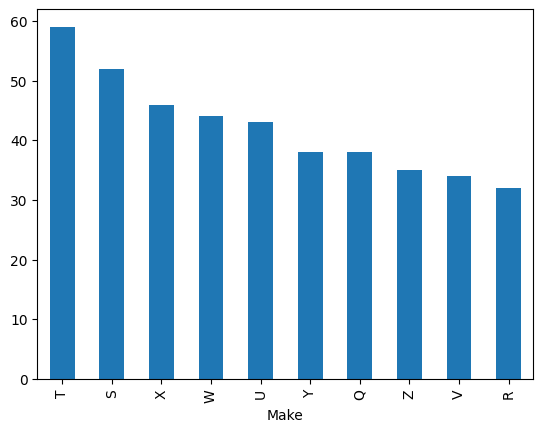

In [300]:
df[df['Failure']==1]['Make'].value_counts().plot(kind='bar')

In [301]:
df[df['Failure']==1]['Make'].value_counts(normalize=True)*100

Make
T    14.014252
S    12.351544
X    10.926366
W    10.451306
U    10.213777
Y     9.026128
Q     9.026128
Z     8.313539
V     8.076010
R     7.600950
Name: proportion, dtype: float64

### **Failures By Service Provider**

In [302]:
df[df['Failure']==1]['Service'].value_counts()

Service
J    58
O    57
M    57
K    53
P    53
N    51
L    46
I    46
Name: count, dtype: int64

<Axes: xlabel='Service'>

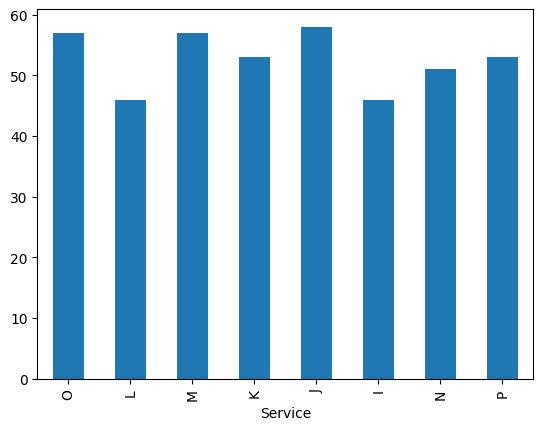

In [303]:
df[df['Failure']==1]['Service'].value_counts(sort=False).plot(kind='bar')

### **Failures By Machine Type**

In [304]:
df[df['Failure']==1]['Type'].value_counts(sort=False)

Type
1    48
3    52
2    56
4    49
6    58
7    46
8    57
5    55
Name: count, dtype: int64

<Axes: xlabel='Type'>

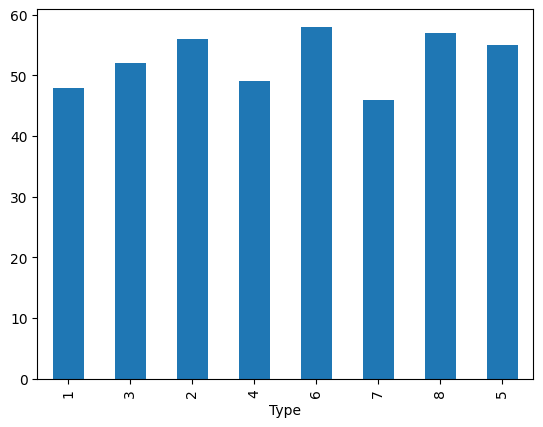

In [305]:
df[df['Failure']==1]['Type'].value_counts(sort=False).plot(kind='bar')

### **Failures By Region**

In [306]:
df[df['Failure']==1]['Region'].value_counts(sort=False)

Region
G     38
C     59
H     27
E     43
A    103
B     87
D     49
F     15
Name: count, dtype: int64

<Axes: xlabel='Region'>

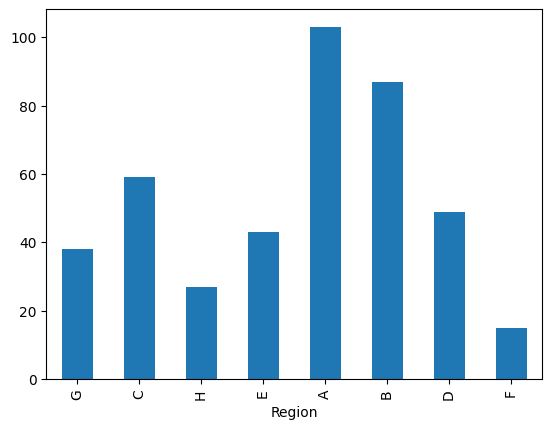

In [307]:
df[df['Failure']==1]['Region'].value_counts(sort=False).plot(kind='bar')

### **Failure By Machine Age**

In [308]:
df[df['Failure']==1].loc[:,['ID','Date','Age']]. \
    groupby(by='ID')['Age'].agg(['mean','min','max','count']). \
    sort_values(by='mean',ascending=False)

,mean,min,max,count
ID,,,,
100380,14537.0,14537,14537,1
100340,13974.0,13974,13974,1
100477,12451.0,12451,12451,1
100234,12335.0,12335,12335,1
100596,12113.0,12113,12113,1
...,...,...,...,...
100074,204.0,204,204,1
100509,156.0,156,156,1
100398,151.0,151,151,1


# **Feature Engineering**

## **Check Machine Specific Data**

In [309]:
print(df['ID'].unique()[:10])

[100001 100003 100009 100014 100017 100018 100019 100020 100022 100036]


In [310]:
df[df['ID']==100275]['Date']

62135   2014-12-02
62136   2014-12-03
62137   2014-12-04
62138   2014-12-05
62139   2014-12-06
           ...    
62861   2016-11-27
62862   2016-11-28
62863   2016-11-29
62864   2016-11-30
62865   2016-12-01
Name: Date, Length: 731, dtype: datetime64[ns]

## **First_Check Feature**

In [311]:
df.groupby(by='ID')['Date'].min()[:5]

ID
100001   2014-12-02
100002   2014-12-02
100003   2014-12-02
100006   2014-12-02
100007   2014-12-02
Name: Date, dtype: datetime64[ns]

In [312]:
df.shape

(307751, 16)

In [313]:
for Machine_ID in df['ID'].sort_values(ascending=True).unique():
    clear_output(wait=False)
    print(Machine_ID)
    First_Check_Date = df[df['ID']==Machine_ID]['Date'].min()
    df.loc[df['ID']==Machine_ID,'First_Check_Date'] = First_Check_Date

100617


In [314]:
print(df.shape)
df.head()

(307751, 17)


,ID,Date,Region,Service,Make,Type,S15,S17,S13,S5,S16,S19,S18,Failure,S8,Age,First_Check_Date
0,100001,2014-12-02,G,O,Y,1,11.088000,145.223448,39.34,3501.0,8.426869,1.9,24.610345,0,0.0,880,2014-12-02
1,100001,2014-12-03,G,O,Y,1,8.877943,187.573214,39.20,3489.0,6.483714,1.9,24.671429,0,0.0,881,2014-12-02
2,100001,2014-12-04,G,O,Y,1,8.676444,148.363704,38.87,3459.0,6.159659,2.0,24.733333,0,0.0,882,2014-12-02
3,100001,2014-12-05,G,O,Y,1,9.988338,133.660000,39.47,3513.0,9.320308,2.0,24.773077,0,0.0,883,2014-12-02
4,100001,2014-12-06,G,O,Y,1,8.475264,197.181600,40.33,3589.0,8.022960,1.5,24.808000,0,0.0,884,2014-12-02


## **Rolling Avg Features**

In [332]:
df[df['ID']==100001].loc[:,['ID','Date','First_Check_Date','Age']]

,ID,Date,First_Check_Date,Age
0,100001,2014-12-02,2014-12-02,880
1,100001,2014-12-03,2014-12-02,881
2,100001,2014-12-04,2014-12-02,882
3,100001,2014-12-05,2014-12-02,883
4,100001,2014-12-06,2014-12-02,884
...,...,...,...,...
726,100001,2016-11-27,2014-12-02,1606
727,100001,2016-11-28,2014-12-02,1607
728,100001,2016-11-29,2014-12-02,1608
729,100001,2016-11-30,2014-12-02,1609


In [352]:
df[df['ID']==ID].sort_values('Date').loc[:,['S15','S17','S13','S5','S16','S19','S18','S8']]

,S15,S17,S13,S5,S16,S19,S18,S8
0,11.088000,145.223448,39.34,3501.0,8.426869,1.9,24.610345,0.00
1,8.877943,187.573214,39.20,3489.0,6.483714,1.9,24.671429,0.00
2,8.676444,148.363704,38.87,3459.0,6.159659,2.0,24.733333,0.00
3,9.988338,133.660000,39.47,3513.0,9.320308,2.0,24.773077,0.00
4,8.475264,197.181600,40.33,3589.0,8.022960,1.5,24.808000,0.00
...,...,...,...,...,...,...,...,...
726,25.680000,0.000000,42.28,3763.0,10.449600,1.4,29.800000,25.72
727,29.760000,0.000000,41.48,3692.0,7.464000,1.4,29.400000,26.16
728,29.040000,0.000000,39.99,3559.0,11.569200,1.4,29.100000,25.40
729,21.600000,0.000000,43.49,3871.0,7.743900,1.4,29.700000,25.98


In [355]:
Time_Windows = [7,14,21]
Roll_Cols = ['S15','S17','S13','S5','S16','S19','S18','S8']

for ID in df['ID'].sort_values().unique():
    clear_output()
    print('Machine ID: ',ID)
    for Time_Window in Time_Windows:
        Time_Window_Rolling_Avg = df[df['ID']==ID].sort_values(by='Date').loc[:,Roll_Cols].rolling(Time_Window).mean()
        print(f'{Time_Window} Days Rolling Avg: ','\n')
        Time_Window_Rolling_Avg

        

Machine ID:  100617
7 Days Rolling Avg:  

14 Days Rolling Avg:  

21 Days Rolling Avg:  



In [356]:
Time_Window_Rolling_Avg

,S15,S17,S13,S5,S16,S19,S18,S8
307020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
307746,23.771429,0.0,47.602381,3189.428571,9.385557,0.2,17.423810,12.880000
307747,23.885714,0.0,47.419048,3177.142857,9.571795,0.2,17.185714,12.720476
307748,23.977143,0.0,47.297143,3169.000000,9.530138,0.2,16.980952,12.400476
307749,23.931429,0.0,47.307619,3169.714286,9.607805,0.2,16.638095,12.522381


In [357]:
df.head()

,ID,Date,Region,Service,Make,Type,S15,S17,S13,S5,S16,S19,S18,Failure,S8,Age,First_Check_Date
0,100001,2014-12-02,G,O,Y,1,11.088000,145.223448,39.34,3501.0,8.426869,1.9,24.610345,0,0.0,880,2014-12-02
1,100001,2014-12-03,G,O,Y,1,8.877943,187.573214,39.20,3489.0,6.483714,1.9,24.671429,0,0.0,881,2014-12-02
2,100001,2014-12-04,G,O,Y,1,8.676444,148.363704,38.87,3459.0,6.159659,2.0,24.733333,0,0.0,882,2014-12-02
3,100001,2014-12-05,G,O,Y,1,9.988338,133.660000,39.47,3513.0,9.320308,2.0,24.773077,0,0.0,883,2014-12-02
4,100001,2014-12-06,G,O,Y,1,8.475264,197.181600,40.33,3589.0,8.022960,1.5,24.808000,0,0.0,884,2014-12-02
